<a href="https://colab.research.google.com/github/MaxTheMooshroom/DS-Unit-2-Linear-Models/blob/master/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. Choose a feature, and plot its relationship with the target.
- [X] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [0]:
df[df['description'].str.find('Lightfoot') >= 0].reset_index().drop('index', axis=1) # all of Scott's Listings

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.0,1,2016-04-26 03:05:59,This beautiful apartment will be your quiet re...,E 69th St.,40.7677,-73.9616,4095,201 E 69th St.,medium,1,1,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,1.0,0,2016-04-17 03:43:55,Beautiful studio with plenty of natural light....,E 86th St.,40.7779,-73.9515,2280,305 E 86th St.,medium,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2.0,3,2016-04-26 02:35:06,The recent renovations definitely accentuate t...,E 94th St.,40.7826,-73.9469,5250,345 E 94th St.,medium,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,2016-04-08 03:51:17,This is an absolute find in the Hell's Kitchen...,W 37th St.,40.7568,-73.9982,3040,505 W 37th St.,low,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
4,1.0,1,2016-04-17 02:46:49,This beautiful apartment will be your quiet re...,E 69th St.,40.7677,-73.9616,3660,201 E 69th St.,low,1,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1.0,1,2016-06-12 02:59:18,Amazing Space with a bounty of natural light! ...,W 97th St.,40.7929,-73.9661,3550,50 W 97th St.,low,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
6,1.0,0,2016-04-08 03:13:43,This underpriced Studio will give you easy acc...,W 57th St.,40.7674,-73.9837,2553,315 W 57th St.,low,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1.0,1,2016-04-08 04:52:47,This great 1 bedroom apartment will certainly ...,W 38th St.,40.7551,-73.9928,3850,320 W 38th St.,low,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0
8,1.0,1,2016-04-26 02:54:09,This is a true 1 Bedroom apartment in an elega...,York Ave.,40.7777,-73.9462,3150,1675 York Ave.,medium,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
9,1.0,2,2016-06-21 07:48:42,Amazing Space with a bounty of natural light! ...,W 97th St.,40.7929,-73.9661,4500,50 W 97th St.,low,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [0]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import matplotlib.pyplot as plt
import numpy as np

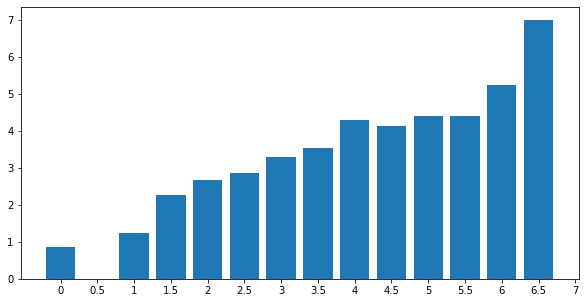

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xticklabels([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
ax.set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
avgs = []
for i in np.arange(0,7,0.5):
  avgs.append(df[df['bathrooms']==i]['bedrooms'].mean()) #for each number of bathrooms, calculate teh mean number of bedrooms
ax.bar(np.arange(0,7,0.5),avgs,width=0.4);

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['bathrooms']], df['bedrooms'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Xfit = np.linspace(0,7)[:, np.newaxis]

In [0]:
yfit = model.predict(Xfit)

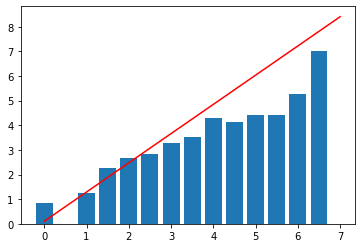

In [0]:
fig, ax = plt.subplots()
ax.set_xticklabels(range(0,8))
ax.set_xticks(range(0, 8))
ax.bar(np.arange(0,7,0.5),avgs,width=0.4)
ax.plot(np.linspace(0,7), yfit,color='red');

In [0]:
def model(featureX, featurey, dataframe):
  model = LinearRegression()
  model.fit(dataframe[[featureX]], dataframe[featurey])
  